In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
# import seaborn as sns
import statistics
import geopandas as gpd
from matplotlib import cm
from collections import OrderedDict

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv').drop(['Unnamed: 0','taster_twitter_handle'], axis = 1)
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'title', 'variety', 'winery'],
      dtype='object')

In [3]:
def year_from_title(series):
    '''Try to determine the vintage year from the title. 
    If there is no number: np.nan
    If there is only one number between 1700 and 2020, return that number
    If there is more than one number, return the number closest to 2000
    Else return np.nan'''
    number_list = np.array([int(i) for i in series.split() if i.isdigit()])
    if len(number_list)==0: return np.nan
    if len(number_list) == 1: 
        result = number_list[0]
    else: 
        delta = np.abs(number_list - 2000)
        argmin = np.argmin(delta)
        result = np.array(number_list)[argmin]
    if 1700 <= result <=2020:
        return result
    return np.nan
    

In [4]:
df['year'] = df['title'].map(year_from_title)

In [5]:
'''Replace country names for mapping'''
country_names = {'England': 'United Kingdom', 
                 'US': 'United States of America', 
                 'Bosnia and Herzegovina': 'Bosnia and Herz.'}
df['country'] = df['country'].replace(country_names)

In [6]:
log_country_counts = np.log(df.groupby('country').count().iloc[:,0])
log_country_counts.name = 'log_country_counts'

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('name')[['geometry']]
world.index.name = 'country'
wine_map = world.join(log_country_counts, how = 'right')


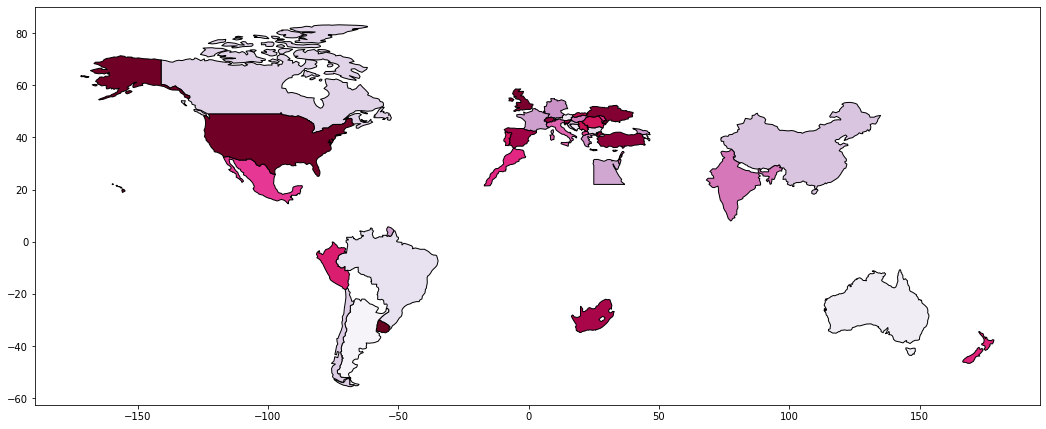

In [8]:
fix, ax = plt.subplots(figsize = (18,14))
wine_map.plot(ax = ax,
             legend = True,
             cmap = 'PuRd',
             edgecolor = 'black',
             legend_kwds={"label": "Wine Ratings by Country",
                         "orientation": "horizontal"})